In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
# reflect the tables
Base =automap_base()
Base.prepare(engine,reflect = True)

In [41]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [42]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [43]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)
session

# Exploratory Precipitation Analysis

In [44]:
# Find the most recent date in the data set.
recent_date = (session.query(Measurement.date)
               .order_by(Measurement.date.desc())
               .first())
recent_date

('2017-08-23',)

2016-08-23


<Axes: xlabel='date'>

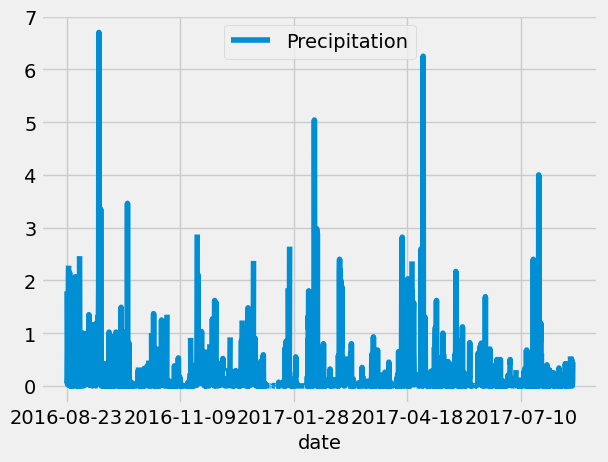

In [45]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
last_twelve_months = dt.date(2017,8,23)
# Calculate the date one year from the last date in data set.

last_twelve_months = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(last_twelve_months)
# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.date,Measurement.prcp)

# Save the query results as a Pandas DataFrame. Explicitly set the column names
scores = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= last_twelve_months)
scores = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= last_twelve_months).all()
# Sort the dataframe by date
df = pd.DataFrame(scores,columns = ['date','Precipitation'])
df.set_index(df['date'],inplace = True)
df = df.sort_index()
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()

In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()



[(9,)]

In [48]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

active_station = session.query(Measurement.station,func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station = active_station[0][0]
session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                filter(Measurement.station == station).all()


[(54.0, 71.66378066378067, 85.0)]

     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


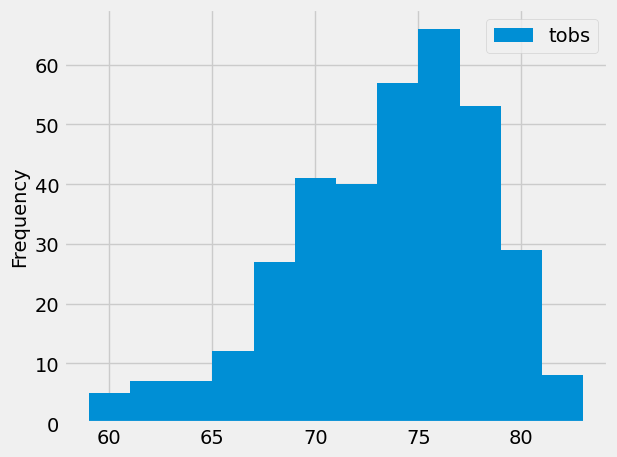

In [68]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_twelve_months = session.query(Measurement.tobs).\
filter(Measurement.station ==station).\
filter(Measurement.date >= last_date).all()
df = pd.DataFrame(last_twelve_months,columns=['tobs'])
print(df)
df.plot.hist(bins=12)
plt.tight_layout()


# Close Session

In [35]:
# Close Session
session.close()